# 1 - Imports and Model Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install rembg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 4.4 MB/s eta 0:00:00


In [ ]:
!pip install onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 6.1 MB/s eta 0:00:00


In [ ]:
!pip install openai

In [ ]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib import image as mpimg
import pandas as pd
import seaborn as sns
import numpy as np
import math
import os
import sys
import time

In [ ]:
import cv2
from PIL import Image, UnidentifiedImageError
from rembg import remove
import shutil
from IPython.display import display

In [ ]:
import torch
from transformers import CLIPProcessor, CLIPModel
from torchvision.transforms import Compose, Resize, CenterCrop, ToTensor, Normalize

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.19k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/605M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/605M [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/862k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIPModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerNorm((512,), eps=1e

In [ ]:
import openai
from google.colab import userdata

client = openai.OpenAI(api_key=userdata.get('openai_key'))

In [ ]:
def load_image_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()

        img = Image.open(BytesIO(response.content))
        return img

    except requests.exceptions.RequestException as e:
        print(f"Error loading image: {e}")
        return None

# Image preprocessing

In [ ]:
def remove_background(dataset_folder):
  for filename in os.listdir(dataset_folder):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
        input_path = os.path.join(dataset_folder, filename)

        try:
            with Image.open(input_path) as img:
                if img.mode in ("RGBA", "LA") and img.getchannel("A").getextrema()[0] < 255:
                    print(f"{filename} sudah transparan, skip.")
                    continue

                output = remove(img)

                if filename.lower().endswith(('.jpg', '.jpeg')):
                    new_filename = os.path.splitext(filename)[0] + ".png"
                    output_path = os.path.join(dataset_folder, new_filename)
                    output.save(output_path)

                    os.remove(input_path)
                    print(f"Background dihapus & disimpan sebagai PNG: {new_filename} (file asli dihapus)")
                else:
                    output.save(input_path)
                    print(f"Background dihapus: {filename}")

        except Exception as e:
            print(f"Gagal memproses {filename}: {e}")

In [ ]:
dataset_folder = "/content/drive/MyDrive/Colab Notebooks/MyStyleMatch/dataset"

In [ ]:
remove_background(dataset_folder)

only_dress8.png sudah transparan, skip.
Background dihapus & disimpan sebagai PNG: sendal1.png (file asli dihapus)
Background dihapus & disimpan sebagai PNG: dress5.png (file asli dihapus)
Background dihapus & disimpan sebagai PNG: dress3.png (file asli dihapus)
sendal1.png sudah transparan, skip.
dress5.png sudah transparan, skip.
dress3.png sudah transparan, skip.


#2 - Zero-shot classification

In [ ]:
def display_images(images):
    num_images = len(images)
    fig, axes = plt.subplots(1, num_images, figsize=(5 * num_images, 5))
    if num_images == 1:
        axes = [axes]
    for idx, image in enumerate(images):
        if image.mode == 'L':
            axes[idx].imshow(image, cmap='gray')
        else:
            axes[idx].imshow(image)
        axes[idx].set_title(f"Image {idx+1}")
        axes[idx].axis("off")
    plt.tight_layout()
    plt.show()

In [ ]:
def open_images(dataset_folder):
    images = []
    for filename in sorted(os.listdir(dataset_folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            try:
                image_path = os.path.join(dataset_folder, filename)
                img = Image.open(image_path)
                images.append(img)
            except UnidentifiedImageError:
                print(f"Gagal membuka gambar: {filename}")

    if images:
        display_images(images)
    else:
        print("Tidak ada gambar valid ditemukan.")

    return images

In [ ]:
def preprocess_image(image):
    return processor(images=image, return_tensors="pt").to(device)

In [ ]:
def encode_image(image):
    inputs = preprocess_image(image)
    with torch.no_grad():
        image_features = model.get_image_features(**inputs)
    return image_features / image_features.norm(p=2, dim=-1, keepdim=True)

In [ ]:
def encode_text(text):
    inputs = processor(text=[text], return_tensors="pt", padding=True).to(device)
    with torch.no_grad():
        text_features = model.get_text_features(**inputs)
    return text_features / text_features.norm(p=2, dim=-1, keepdim=True)

In [ ]:
encode_text("I want mini summer dress")

tensor([[-1.6621e-02, -4.1094e-02, -3.2450e-02,  4.4846e-02, -5.2628e-03,
          2.0228e-02,  1.9187e-02, -9.3458e-02, -1.1465e-02,  1.0949e-02,
          2.9962e-02,  3.2576e-03, -9.1542e-04, -5.9286e-03, -3.2343e-02,
         -7.2900e-03, -3.7924e-02,  2.4919e-02, -1.6755e-03, -5.5580e-03,
         -6.5447e-03, -1.6718e-02, -1.0387e-02,  3.1443e-02, -6.3228e-03,
          1.1238e-03, -1.2969e-02,  4.7864e-02, -2.2463e-02, -4.6481e-02,
         -7.0812e-02,  2.6646e-02,  3.6347e-02,  4.4060e-02, -3.6912e-02,
         -1.1575e-02,  1.8634e-03, -4.0880e-02, -3.7103e-02,  3.1100e-02,
         -2.3647e-04, -1.7848e-02, -1.4714e-02,  1.3684e-02, -9.6010e-03,
          3.1729e-02,  3.5233e-03, -5.2615e-02,  4.9170e-04,  1.4383e-02,
          2.0307e-02, -3.6615e-02, -2.7728e-02, -3.2944e-02, -4.3990e-02,
          1.5124e-02, -1.5197e-02, -1.0004e-01,  4.1745e-02, -1.8734e-02,
          3.8109e-02,  3.5644e-02, -3.3546e-02, -3.4214e-02, -4.0054e-02,
         -1.4210e-02,  2.4047e-03,  5.

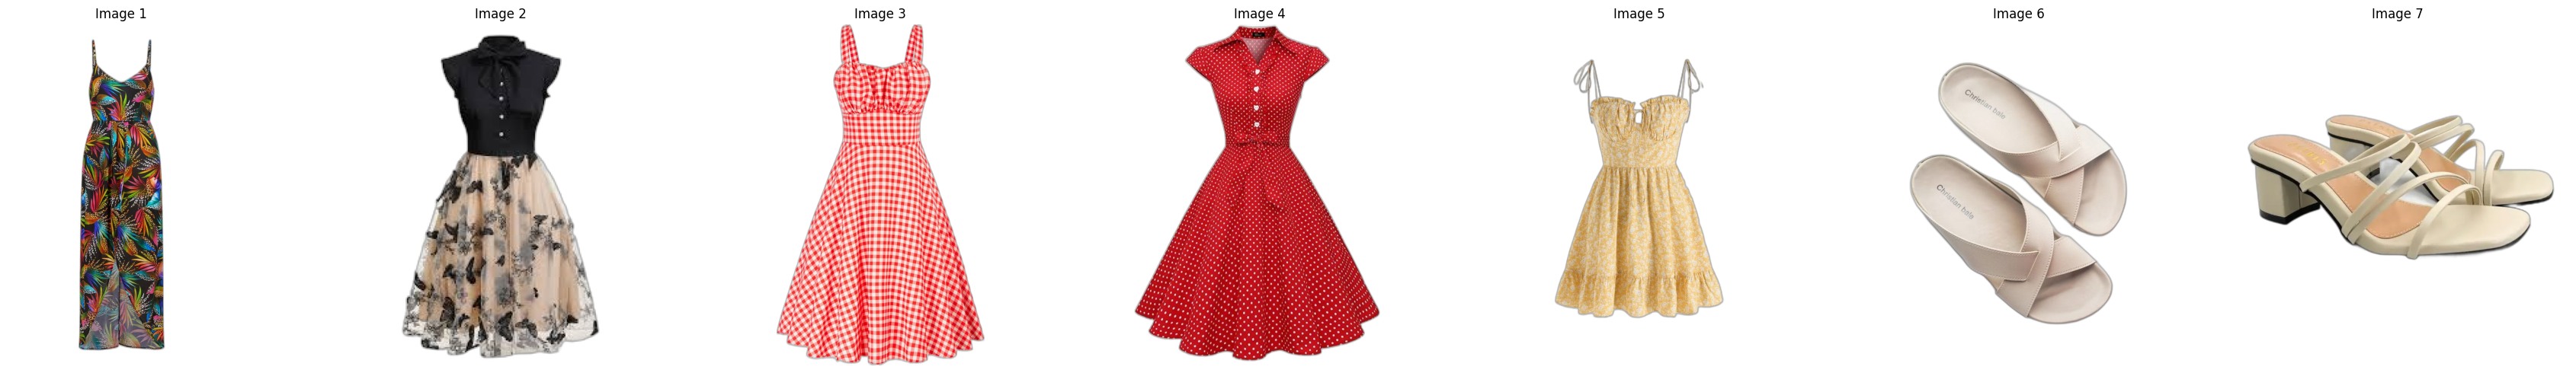

In [ ]:
images = open_images(dataset_folder)

### Prompt proprocessing

In [ ]:
def prompt_preprocessing(long_prompt, categories, max_retries=3):
    """
    Fungsi untuk menyederhanakan prompt pengguna berdasarkan kategori fashion dan mengembalikannya dalam format JSON.

    Args:
    - long_prompt (str): prompt dari user
    - categories (list): daftar kategori fashion, contoh: ["dress", "sandal"]
    - client: instance OpenAI client, misal: `openai`
    - max_retries (int): jumlah maksimum percobaan jika terjadi error

    Returns:
    - dict: hasil dalam format JSON sesuai kategori
    """
    input_example = "hari ini saya ingin ke taman bunga berfoto-foto, saya bingung mau pakai outfit apa, pilihkan outfit yang cocok untuk berjalan-jalan ke taman bunga"
    response_example = {
        "dress": "dress yang cocok digunakan untuk berfoto di taman bunga",
        "sandal": "sandal yang cocok digunakan untuk berjalan-jalan ke taman bunga"
    }

    system_prompt = f"""
Kamu adalah asisten fashion yang bertugas menyederhanakan dan mengubah prompt dari user menjadi kebutuhan fashion yang relevan berdasarkan kategori tertentu.

### Contoh:
User Prompt:
"{input_example}"

Kategori:
{categories}

Output yang diharapkan (format JSON):
{response_example}

### Instruksi:
Berdasarkan prompt yang diberikan user dan daftar kategori, buatlah JSON dengan setiap kategori sebagai key, dan deskripsi singkat sebagai value yang menjelaskan kebutuhan fashion yang sesuai dengan konteks prompt user.

Hasilkan JSON sesuai format, hanya deskripsi pendek tapi jelas dan kontekstual untuk tiap kategori.
"""

    retries = 0
    while retries < max_retries:
        try:
            response = client.chat.completions.create(
                model="gpt-4o",
                messages=[
                    {"role": "system", "content": system_prompt},
                    {"role": "user", "content": f'Prompt: "{long_prompt}"\nKategori: {categories}'}
                ],
                temperature=0.2
            )

            content = response.choices[0].message.content.strip()
            short_prompts = eval(content) if content.startswith("{") else {}
            return short_prompts

        except Exception as e:
            print(f"Terjadi kesalahan: {e}")
            retries += 1
            time.sleep(2)

    return {}

In [ ]:
long_prompt = "pilihkan summer outfit untuk berfoto-foto di taman bunga"
outfit_options = ["dress", "sandal"]

In [ ]:
result = prompt_preprocessing(long_prompt, outfit_options)
print(result)

{'dress': 'dress yang cocok digunakan untuk berfoto saat sunset di pantai', 'sandal': 'sandal yang nyaman untuk berjalan di pantai'}


### Outfit picker

In [ ]:
def get_outfit(prompts, dataset_folder):
    if not isinstance(prompts, list) or len(prompts) == 0:
        print("Masukkan list prompt minimal satu.")
        return

    print(f"Searching your outfit...")

    text_embeddings = [encode_text(p) for p in prompts]

    image_index = []
    for filename in sorted(os.listdir(dataset_folder)):
        if filename.lower().endswith(('.jpg', '.jpeg', '.png', '.webp')):
            try:
                image_path = os.path.join(dataset_folder, filename)
                img = Image.open(image_path)
                emb = encode_image(img)
                image_index.append((filename, emb, img))
            except UnidentifiedImageError:
                print(f"Gagal membuka gambar: {filename}")

    if not image_index:
        print("Tidak ada outfit ditemukan.")
        return

    top_results = []
    probabilities_matrix = []

    for i, text_emb in enumerate(text_embeddings):
        similarities = [(filename, torch.cosine_similarity(text_emb, emb, dim=-1).item(), img)
                        for filename, emb, img in image_index]
        probabilities_matrix.append([score for _, score, _ in similarities])
        similarities.sort(key=lambda x: x[1], reverse=True)
        top_filename, top_score, top_image = similarities[0]
        top_results.append((top_filename, top_score, top_image, prompts[i]))

    num_results = len(top_results)
    fig, axes = plt.subplots(1, num_results, figsize=(5 * num_results, 5))
    if num_results == 1:
        axes = [axes]

    for idx, (filename, score, image, prompt) in enumerate(top_results):
        axes[idx].imshow(image)
        axes[idx].axis("off")

    plt.tight_layout()
    plt.show()

    for filename, score, _, prompt in top_results:
        print(f"[{prompt}] → {filename} (Skor: {score:.4f})")

    print("\nMatriks Probabilitas:")
    print(f"        {' '.join([f'img{idx+1}' for idx in range(len(image_index))])}")
    for i, row in enumerate(probabilities_matrix):
        print(f"prompt {i+1}  {' '.join([f'{score:.4f}' for score in row])}")

In [ ]:
def outfit_picker(prompt_from_user, outfit_options, dataset_folder):
    short_prompts = prompt_preprocessing(prompt_from_user, outfit_options)
    print(short_prompts)
    prompts = list(short_prompts.values())
    get_outfit(prompts, dataset_folder)

In [ ]:
long_prompt = "aku bingung mau pakai outfit apa aku mau jalan-jalan dan berfoto-foto di taman bunga, rekomendasikan summer mini outfit yang cocok"
outfit_options = ["dress", "sandal"]

{'dress': 'summer mini dress yang cocok untuk berfoto di taman bunga', 'sandal': 'sandal yang nyaman untuk berjalan-jalan di taman bunga'}
Searching your outfit...


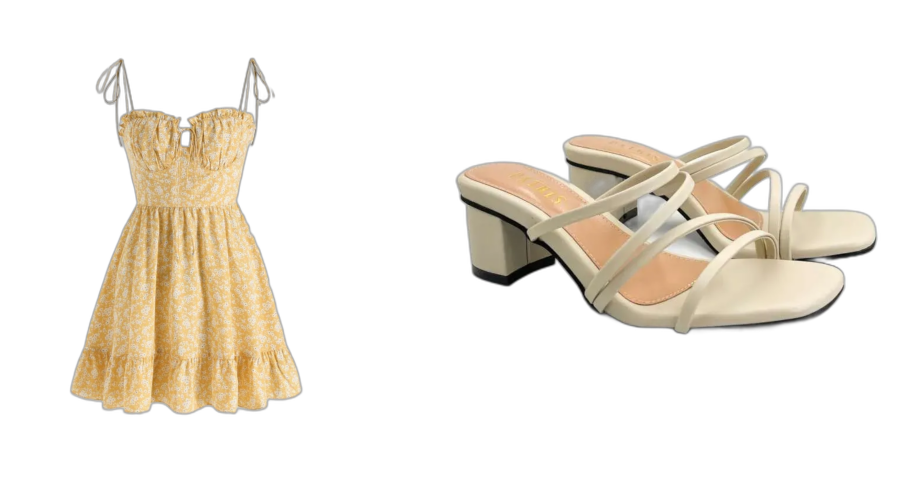

[summer mini dress yang cocok untuk berfoto di taman bunga] → only_dress8.png (Skor: 0.2977)
[sandal yang nyaman untuk berjalan-jalan di taman bunga] → sendal2.webp (Skor: 0.2470)

Matriks Probabilitas:
        img1 img2 img3 img4 img5 img6 img7
prompt 1  0.2261 0.2529 0.2757 0.2462 0.2977 0.1778 0.2025
prompt 2  0.1990 0.1637 0.1725 0.1615 0.1611 0.2372 0.2470


In [ ]:
outfit_picker(long_prompt, outfit_options, dataset_folder)